In [56]:
from tools import reward, all_valid
import numpy as np
from Adaptor import Adaptor_rte
import math

In [57]:
baseline = np.load("filtered_baseline.npy")
case = np.load("f=0.85_s=0.9_dmg1.npy")
adaptor_rte = Adaptor_rte(v=0.5)

In [58]:
# RTE
state_x = 0
state_y = 0
state_theta = 0.7
# state_theta = 0
outcomes = np.zeros((len(baseline), 2), dtype=np.float32)

budget = 30

positions = np.zeros((budget, 2), dtype=np.float32)
complete_index = budget

for i in range(budget):
    R_matrix = np.array([
        [math.cos(state_theta), -math.sin(state_theta)],
        [math.sin(state_theta), math.cos(state_theta)]
    ], dtype=np.float32)

    predicted_x, predicted_y = adaptor_rte.predict(baseline[:, :2])
    outcomes[:, 0] = predicted_x[:, 0]
    outcomes[:, 1] = predicted_y[:, 0]
    outcomes = outcomes @ R_matrix.T
    outcomes[:, 0] += state_x
    outcomes[:, 1] += state_y

    rewards = reward((state_x, state_y), outcomes)

    next_action_index = np.argmax(rewards)
    # print(outcomes[next_action_index])
    # print(next_action_index)

    true_x , true_y = case[next_action_index, :2]
    true_v, true_w, true_phi = case[next_action_index, 2:]

    step_data = np.zeros((2, 3))
    step_data[:, 0] = baseline[next_action_index, 0]
    step_data[:, 1] = baseline[next_action_index, 1]
    step_data[0, 2] = true_x - baseline[next_action_index, 0]
    step_data[1, 2] = true_y - baseline[next_action_index, 1]
    adaptor_rte.read_data(step_data)


    new_x = math.cos(state_theta)*true_x - math.sin(state_theta)*true_y + state_x
    new_y = math.sin(state_theta)*true_x + math.cos(state_theta)*true_y + state_y

    # trajectory_samples = np.zeros((16, 2), dtype=np.float32)
    # theta = np.linspace(0, 4, 16) * true_w + state_theta + true_phi
    # trajectory_samples[:, 0] = true_v / true_w * (np.sin(theta) - math.sin(state_theta + true_phi))
    # trajectory_samples[:, 1] = true_v / true_w * (math.cos(state_theta + true_phi) - np.cos(theta))
    # print(state_theta * 57.296)

    if all_valid((state_x, state_y), (new_x, new_y)):
    # if all_valid(trajectory_samples):
    #     state_x += math.cos(state_theta)*true_x - math.sin(state_theta)*true_y 
    #     state_y += math.sin(state_theta)*true_x + math.cos(state_theta)*true_y
        state_x = new_x
        state_y = new_y
        state_theta += 4*true_w
    else:
        print("here", i+1)
    
    positions[i] = state_x, state_y

    if state_y > 22.09:
    # if state_y > 12.09:
        print("early complete:", i+1, "steps" if i else "step")
        complete_index = i + 1
        break








# rte_adaptation = np.zeros((100, 26), dtype=np.float32)
# for round_index in range(100):
#     adaptor_rte = Adaptor_rte(v=0.5)
#     errors = np.zeros(26)
#     step_taken = steps_taken[round_index]

#     for i, index in enumerate(step_taken):
#         if i:
#             step_data = np.zeros((2, 3))
#             step_data[:, 0] = baseline[index, 0]
#             step_data[:, 1] = baseline[index, 1]
#             step_data[0, 2] = case[index, 0] - baseline[index, 0]
#             step_data[1, 2] = case[index, 1] - baseline[index, 1]
#             adaptor_rte.read_data(step_data)
            
#         predicted_x, predicted_y = adaptor_rte.predict(baseline[:, :2])
#         errors[i] = np.mean(np.square(predicted_x[:, 0] - true_x) + np.square(predicted_y[:, 0] - true_y))
#     rte_adaptation[round_index] = errors

# print(rte_adaptation.shape)
# np.save(f"rte_case{case_index}.npy", rte_adaptation)

here 8
early complete: 20 steps


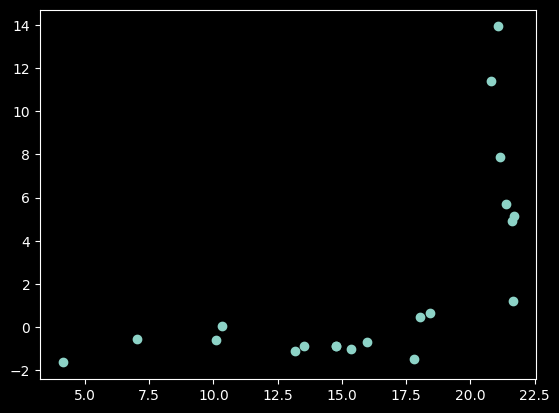

In [59]:
import matplotlib.pyplot as plt

plt.scatter(positions[:complete_index, 0], positions[:complete_index, 1])
plt.show()

In [60]:
print(positions[:complete_index])

[[ 4.1269875  -1.6450902 ]
 [ 7.0100455  -0.56616044]
 [10.088262   -0.5926177 ]
 [10.320764    0.03225886]
 [13.185621   -1.094107  ]
 [13.517073   -0.8698461 ]
 [14.751012   -0.87443143]
 [14.751012   -0.87443143]
 [15.349954   -1.0407261 ]
 [15.9856     -0.67365354]
 [17.801388   -1.467073  ]
 [18.435177    0.64785254]
 [18.051172    0.4627526 ]
 [21.679829    1.2177927 ]
 [21.623177    4.923736  ]
 [21.683517    5.1535573 ]
 [21.376587    5.694093  ]
 [21.146236    7.889893  ]
 [20.817665   11.395097  ]
 [21.076561   13.931478  ]]
